#  🔷 **Projeto Grupo BT-G3**

<center><img src="https://cdn.discordapp.com/attachments/937463646181785633/1100078873422602350/BTG3_1.png" width="50%" height="30%"/></center>

## 🚀 **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="30%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais.</h2>

<h2 align='center'>A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar os sentimentos das campanhas de marketing, voltadas para o Instagram. </h2>

<h2 align='center'> O objetivo principal dessa solução é acatar os dados, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente, a partir do sentimento exposto dentro daquela campanha.</h2>

# ❗ **Sobre os dados**

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do banco BTG Pactual, o qual disponibilizou o dataset.

Com base nas informações dispostas nesse dataset, realizamos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

Agradecemos a compreensão 🤓

# 💻 **Sobre o notebook**

O projeto foi realizado através do Google Colaboratory / Jupyter Notebook (arquivo IPYNB). Nas sessões seguintes iremos demonstrar um passo a passo de como os dados foram manejados até chegar em uma conclusão e na entrega do modelo. As sessões estão estruturadas da seguinte forma:

1. Setup do notebook;
2. Exploratória dos dados;
3. Criação de features;
4. Pré-processos dos dados;
5. Modelo de Vetorização;
5. Construção do Modelo;
6. Interpretação e Avaliação do modelo;

**OBS**: O notebook foi desenvolvido com foco em funções, para que fosse possível fazer a substituição de qualquer variável e obter o resultado a partir de uma nova base.

# ⏰ Principais mudanças da última Sprint

1. Fizemos a escolha de proceder com o processo de vetorização Word2Vec
2. Escolhemos o algoritmo Random Forest como principal
3. Desenvolvemos este notebook para apresentar como notebook final
4. Desenvolvemos o serviço de mostragem do que foi desenvolvido, a partir da ferramenta Streamlit (está em uma pasta do GitHub)
5. Refinamos os hiperparâmetros do modelo para buscar um melhor valor de recall. No final, tivemos um modelo de 81% de recall voltado para os negativos, que era o nosso objetivo.

# 1. 🔧 Setup - Instalações

A configuração do setup é o ato de preparar e arrumar o ambiente de maneira apropriada para ser utilizado. Isso inclui a instalação de bibliotecas e a realização de ajustes necessários.

O propósito é criar um ambiente operacional no qual seja possível realizar tarefas específicas com eficiência.

## 1.1 Conexão com o Google Drive (se necessário)

In [1]:
#Conectar com o Google Drive - Para casos de uso do Google Colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Instalação e Importação de bibliotecas

In [148]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-06-23 12:58:33.580242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [151]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import unidecode
import seaborn as sns
from collections import Counter

import emoji
import spacy
import nltk

nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('rslp')
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors, Word2Vec

import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. 🌎 Exploratória dos dados

## 2.1 Leitura e visualização do CSV

- Explicar o porque de eu estar tirando a coluna autor

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/Bases/base_nova_csv.csv')
df_original = df.drop(columns=['"autor"'])
df_original

,id,"""dataPublicada""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""","""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


In [8]:
df_original.columns

Index(['id', '"dataPublicada"', '"texto"', '"sentimento"', '"tipoInteracao"',
       '"anomalia"', '"probabilidadeAnomalia"', '"linkPost"', '"processado"',
       '"contemHyperlink"'],
      dtype='object')

In [9]:
df_original.dtypes

id                          int64
"dataPublicada"            object
"texto"                    object
"sentimento"               object
"tipoInteracao"            object
"anomalia"                  int64
"probabilidadeAnomalia"     int64
"linkPost"                 object
"processado"                int64
"contemHyperlink"           int64
dtype: object

## 2.2 Tratamento da base

### 2.2.1 Retirada de " " (aspas) das colunas

In [10]:
def tiraAspas(base):
    df = base.rename(columns=lambda x: re.sub('[\"\']', '', x))
    return df

df_tratada = tiraAspas(df_original)
df_tratada

,id,dataPublicada,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,1,"""2022-03-04 09:38:00""",Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""","""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


In [11]:
df_tratada['sentimento'].value_counts()

NEUTRAL     5344
POSITIVE    4487
NEGATIVE    2524
Name: sentimento, dtype: int64

In [12]:
df_tratada['tipoInteracao'].value_counts()

marcação      5999
comentário    5389
resposta       967
Name: tipoInteracao, dtype: int64

In [13]:
df_tratada['anomalia'].value_counts()

0    9608
1    2747
Name: anomalia, dtype: int64

In [14]:
df_tratada['contemHyperlink'].value_counts()

0    12288
1       67
Name: contemHyperlink, dtype: int64

In [15]:
df_tratada['processado'].value_counts()

0    12355
Name: processado, dtype: int64

### 2.2.2 Drop nas linhas com **Anomalia**

- Explicar o que é Anomalia e as outras colunas que influenciam nela

In [16]:
df_sem_anomalia = df_tratada[df_tratada['anomalia'] != 1]
df_sem_anomalia

,id,dataPublicada,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
1,2,"""2022-03-04 09:29:00""",A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
5,6,"""2022-03-03 20:54:00""",Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
...,...,...,...,...,...,...,...,...,...,...
12346,3043812,"""2022-11-30 11:27:00""",Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12349,3044012,"""2022-11-30 12:00:00""",Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
12351,3044212,"""2022-11-30 12:25:00""",Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12353,3044412,"""2022-11-30 12:50:00""","""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


### 2.2.3 Drop nas colunas que não nos servem

In [17]:
df_dropado = df_sem_anomalia.drop(['id', 'dataPublicada', 'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado', 'contemHyperlink'], axis=1)
df_dropado

,texto,sentimento,tipoInteracao
1,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,Minuto touro de ouro,POSITIVE,comentário
4,@ricktolledo Sim,NEUTRAL,resposta
5,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...
12346,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
12349,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
12351,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12353,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


In [18]:
df_tratada['sentimento'].value_counts()

NEUTRAL     5344
POSITIVE    4487
NEGATIVE    2524
Name: sentimento, dtype: int64

In [19]:
df = df_dropado.reset_index(drop=True)
df

,texto,sentimento,tipoInteracao
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
2,Minuto touro de ouro,POSITIVE,comentário
3,@ricktolledo Sim,NEUTRAL,resposta
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...
9603,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
9604,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
9605,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
9606,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


## 2.3 Plotando Gráficos

#### Os tipos de interações mais frequentes

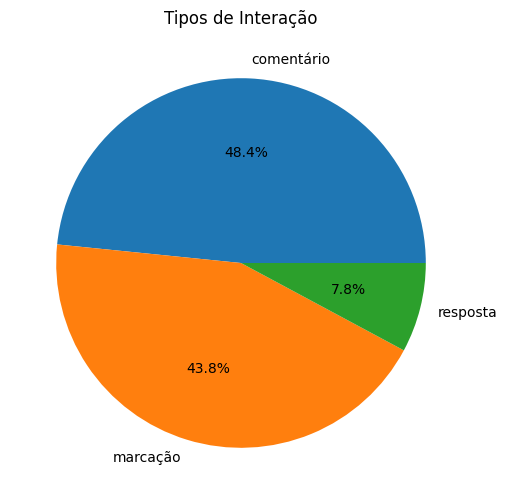

In [20]:
# Contar os tipos de interação
count_interactions = df['tipoInteracao'].value_counts()
# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
count_interactions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Interação')
plt.ylabel('')
plt.show()

#### Tipos de sentimentos mais frequentes

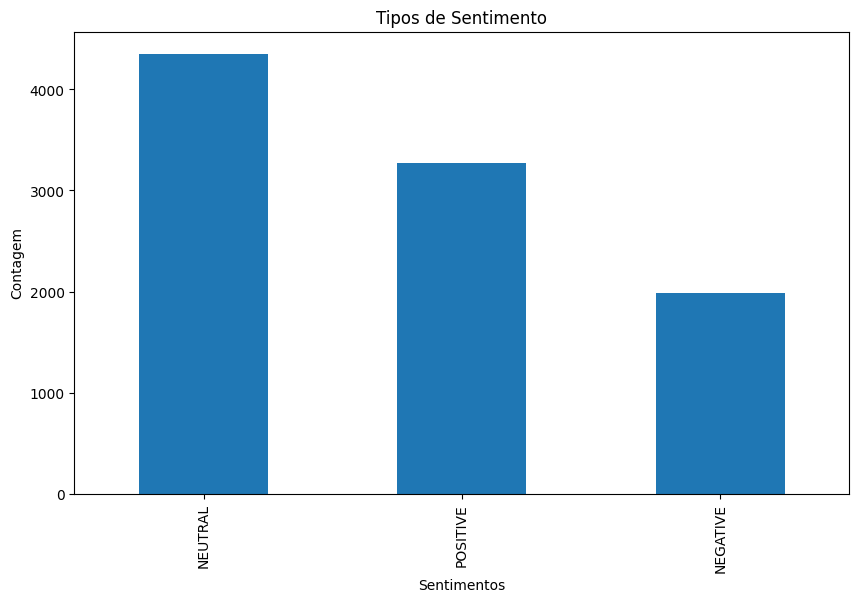

In [21]:
# Contar os tipos de sentimentos
count_sentimentos = df['sentimento'].value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
count_sentimentos.plot(kind='bar')
plt.xlabel('Sentimentos')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

#### Frequência dos sentimentos por tipo de Interação

<Figure size 1000x600 with 0 Axes>

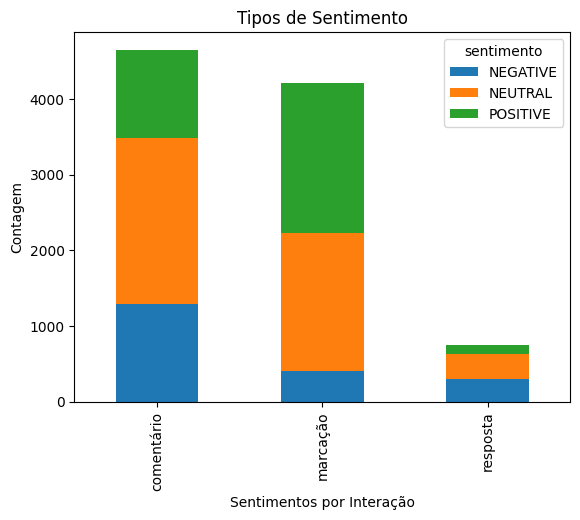

In [22]:
# Contar os tipos de sentimentos por Interação
contagem = df.groupby(['tipoInteracao', 'sentimento']).size().unstack(fill_value=0)

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', stacked=True)
plt.xlabel('Sentimentos por Interação')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

# 3. 🔍 Criação de features

- Nesta seção iremos criar as features que irão ajudar o nosso modelo a analisar novas frases e descobrir o sentimento por trás delas.
- Essas features serão uma lista de emojis feita a mão por nós!
- A lista pode ser modificada, tanto em sua quantidade, quanto em seus valores textuais.

In [23]:
df

,texto,sentimento,tipoInteracao
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
2,Minuto touro de ouro,POSITIVE,comentário
3,@ricktolledo Sim,NEUTRAL,resposta
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...
9603,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
9604,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
9605,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
9606,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


## 3.1 Emojis presentes no dataset

In [24]:
# Cria um conjunto vazio para armazenar os emojis encontrados
emojis_encontrados = set()

# Define uma expressão regular para encontrar emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # símbolos e pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte e símbolos de mapas
                           u"\U0001F1E0-\U0001F1FF"  # bandeiras do mundo
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

# Itera sobre cada linha do dataframe e extrai os emojis da coluna 'texto'
for text in df['texto']:
    emojis_encontrados.update(set(emoji_pattern.findall(text)))

# Converte o conjunto de emojis encontrados em uma lista
lista_de_emojis = list(emojis_encontrados)

# Cria uma lista vazia para armazenar os emojis separados
emojis_separados = []

# Itera sobre a lista de emojis e adiciona cada caracter a uma nova lista
for emoji in lista_de_emojis:
    emojis_separados.extend(list(emoji))

# Exibe a lista de emojis separados
print('Lista de emojis separados:')
print(emojis_separados)

# Conta a frequência de cada emoji na lista de emojis separados
frequencia_de_emojis = Counter(emojis_separados)

# Exibe a frequência de cada emoji
print('Frequência de cada emoji:')
for emoji, frequencia in frequencia_de_emojis.items():
    print(f'{emoji}: {frequencia}')

Lista de emojis separados:
['👈', '👈', '👈', '👈', '𝙸', '𝚗', '𝚊', '𝚞', '𝚐', '𝚞', '𝚛', '𝚊', '𝚌', '♀', '️', '💯', '🇧', '🇷', '💚', '🎾', '🏦', '🌹', '🌹', '🌹', '🌹', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '☀', '️', '💥', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '🇭', '🇺', '👏', '👏', '👏', '👏', '👏', '👏', '😍', '😍', '😍', '😍', '🔥', '🍎', '𝙣', '𝙤', '🚙', '🚙', '💨', '💨', '𝚜', '𝚎', '𝚞', '𝚜', '👏', '😍', '👏', '😍', '👏', '😍', '🚀', '✨', '👩', '🏻', '📊', '🗒', '📉', '📈', '𝚌', '𝚛', '𝚎', '𝚍', '𝚎', '𝚗', '𝚌', '𝚒', '𝚊', '𝚍', '👉', '🙏', '🏼', '📊', '😍', '🏆', '🏆', '🇭', '🇺', '♥', '️', '💚', '🐎', '💙', '👏', '𝚊', '𝚕', '𝚝', '𝚎', '𝚛', '𝚗', '𝚊', '𝚝', '𝚒', '𝚟', '𝚊', '𝚜', '💙', '💙', '✅', '🇭', '🇺', '🇭', '🇺', '❤', '️', '💚', '𝚊', '𝚕', '𝚒', '𝚊', '𝚍', '𝚘', '👏', '👏', '👏', '💙', '✨', '💰', '🚀', '🙏', '🙏', '💕', '❤', '️', '❤', '️', '❤', '️', '💟', '💟', '👏', '👏', '👏', '👏', '👏', '🙌', '😇', '👼', '😁', '👊', '🏻', '🔥', '🚀', '☎', '💪', '🏻', '✌', '🏽', '💰', '𝚜', '𝚊', '𝚒', '𝚛', '👎', '👎', '👎', '👎', '👎', '👎

## 3.2 Frequência dos emojis

In [25]:
def frequencia(input):
    emojis = frequencia_de_emojis
    dfCount = pd.DataFrame(list(emojis.items())) # transformando em dataframe para melhor visualização
    dfCount.rename(columns={0: "Emoji", 1:"Frequência"}, inplace=True) # renomeando as colunas
    final_df = dfCount.sort_values(by=['Frequência'], ascending=False) # ordenando o dataframe
    return final_df

In [26]:
output = frequencia(df['texto'])
output.head(10)

,Emoji,Frequência
22,👏,608
32,🚀,223
9,️,218
35,🏻,168
11,🇧,148
24,🔥,143
53,❤,140
12,🇷,137
44,🏼,119
21,🇺,119


## 3.3 Criação das colunas/features com valor textual dos emojis


In [27]:
emoji_dict = {
    '😄': 'sorriso',
    '😆': 'risos',
    '😊': 'envergonhado',
    '😃': 'sorridente',
    '😏': 'sorriso',
    '😍': 'olhos_coracao',
    '😘': 'beijo_coracao',
    '😚': 'beijo_olhos_fechados',
    '😳': 'corado',
    '😌': 'aliviado',
    '😉': 'satisfeito',
    '😁': 'sorrisao',
    '😜': 'piscadela',
    '😝': 'lingua_fora_olhos_fechados',
    '😀': 'rindo_muito',
    '😗': 'beijo',
    '😙': 'beijo_sorriso_olhos',
    '😛': 'lingua_fora',
    '😴': 'dormindo',
    '😟': 'preocupado',
    '😦': 'franzindo_testa',
    '😧': 'angustiado',
    '😮': 'boca_aberta',
    '😬': 'careta',
    '😕': 'confuso',
    '😯': 'silencioso',
    '😑': 'expressão_neutra',
    '😒': 'desinteressado',
    '😅': 'sorriso_suado',
    '😔': 'desapontado',
    '😨': 'amedrontado',
    '😰': 'suando_frio',
    '😣': 'perseverando',
    '😢': 'choro',
    '😭': 'choro',
    '😂': 'alegria',
    '😲': 'surpreso',
    '🤓': 'nerd',
    '😫': 'cansado',
    '😠': 'raiva',
    '😡': 'raiva_intensa',
    '😤': 'bufada',
    '😋': 'delicioso',
    '😷': 'mascara',
    '😎': 'oculos_escuros',
    '😵': 'morte',
    '👿': 'diabinho',
    '😈': 'diabinho',
    '😶': 'sem_boca',
    '💙': 'coração',
    '✨': 'brilho',
    '🌟': 'estrela brilhante',
    '💥': 'explosao',
    '❗': 'exclamacao',
    '❓': 'interrogacao',
    '💤': 'sono',
    '🔥': 'fogo',
    '💩': 'cocô',
    '👌': 'ok',
    '👊': 'soquinho',
    '👋': 'aceno',
    '🙌': 'maos_ceu',
    '🙏': 'rezando',
    '👏': 'palmas',
    '💪': 'força',
    '🖕': 'dedo_meio',
    '👉': 'apontando_direita',
    '🙈': 'vergonha',
    '💋': 'beijo',
    '🎉': 'celebração',
    '🎊': 'confete',
    '📞': 'telefone',
    '📣': 'anuncio',
    '⌛': 'tempo_acabando',
    '⏰': 'alarme',
    '💰': 'grana',
    '💣': 'bomba',
    '📈': 'gráfico_subindo',
    '📉': 'gráfico_descendo',
    '📅': 'calendário',
    '🏦': 'banco',
    '🚀': 'foguete',
    '🚨': 'sirene',
    '🔝': 'top',
    '🆙': 'up',
    '🆘': 'socorro',
    '🔞': 'proibido_menores_idade',
    '🔜': 'breve',
    '❌': 'erro',
    '💯': 'perfeição',
    '✅': 'aprovado',
    '⤵️': 'seta_para_baixo_esquerda',
    '⚠️': 'atenção',
    '🤯': 'cabeça_explodindo',
    '💸': 'dinheiro',
    '📍': 'localização',
    '💕': 'localização',
    '🍀': "trevo",
    '🏆': "trofeu" ,
    '💖': "coracao_pixel" ,
    '👽': "alien" ,
    '🎯': "alvo",
    '📊': "grafico_barra",
    '👎': "ruim",
    '😐': "entediado",
    '😇': "anjo" ,
    '👼': "anjo",
    '💵': "dinheiro",
    '💴': "dinheiro",
    '💳': "cartao",
    '💻': "computador",
    '📷': "camera",
    '👍': "bom",
    '😞': "decepcao",
    '💚': "coracao",
    '🚫': "bloqueado",
    '💲': "dinheiro",
    '🌹': "flor",
    '👀': "olhos",
    '👈': "mao_esquerda",
    '💓': "coracao",
    '💜': "coracao",
    '🙃': "cara_baixo",
    '👻': "fantasma",
    '👇': "dedo_baixo",
    '😱': "assustado",
    '😩': "nervoso",
    '💛': "coracao",
    '😻': "apaixonado",
    '😺': "feliz",
    '🤒': "doente"
}

In [28]:
len(emoji_dict)

131

In [29]:
# Função para verificar a existência de cada emoji no texto
def verifica_emoji(texto, emoji):
    if emoji in texto:
        return 1
    else:
        return 0

# Adiciona uma coluna para cada emoji no DataFrame
for emoji, descricao in emoji_dict.items():
    df[descricao] = df['texto'].apply(lambda x: verifica_emoji(x, emoji))

# Exibe o DataFrame resultante
df

<ipython-input-29-1a17a4bdb9d8>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[descricao] = df['texto'].apply(lambda x: verifica_emoji(x, emoji))
<ipython-input-29-1a17a4bdb9d8>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[descricao] = df['texto'].apply(lambda x: verifica_emoji(x, emoji))
<ipython-input-29-1a17a4bdb9d8>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

,texto,sentimento,tipoInteracao,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,POSITIVE,comentário,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,NEUTRAL,resposta,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9604,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9605,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9606,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df['palmas'].value_counts()

0    8601
1    1007
Name: palmas, dtype: int64

# 4. ⌛ Pré-Processamento dos dados

Aqui em Pré-processamento, faremos a definição de diversas funções referentes aos tratamentos que mostramos acima!

Assim, nosso objetivo aqui é simplificar os as frases, separando em palavras, alterando o valor semântico, tratando abreviações, etc., com o objetivo de fazer as frases mais simplórias e deixar a vetorização mais "assertiva", resultando numa melhor análise do modelo.

essa é a lista de tratamentos que iremos fazer em nosso *corpus*:

1. Tokenização
2. Tratamento de emojis
3. Remoção de Alfanuméricos
4. Tratamento de abreviações
5. Remoção de Stopwords
6. Lematização

- Retirando a coluna de 'TipoInteracao' pois não iremos usar mais

In [31]:
df = df.drop(['tipoInteracao'], axis=1)
df

,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,Atendam o telefone pelo amor de Deus,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9604,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9605,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9606,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.1 Criação das Funções

### 4.1.1 Tokenização

In [32]:
def tokenizer(comentarios):
  comentarios_tokenizados = []
  tk = TweetTokenizer()
  for comentario in comentarios:
    palavras = tk.tokenize(comentario.lower())
    comentarios_tokenizados.append(palavras)
  return comentarios_tokenizados

### 4.1.2 Tratamento de emojis

In [33]:
emoji_dict = {
    '😄': 'sorriso',
    '😆': 'risos',
    '😊': 'envergonhado',
    '😃': 'sorridente',
    '😏': 'sorriso',
    '😍': 'olhos_coracao',
    '😘': 'beijo_coracao',
    '😚': 'beijo_olhos_fechados',
    '😳': 'corado',
    '😌': 'aliviado',
    '😉': 'satisfeito',
    '😁': 'sorrisao',
    '😜': 'piscadela',
    '😝': 'lingua_fora_olhos_fechados',
    '😀': 'rindo_muito',
    '😗': 'beijo',
    '😙': 'beijo_sorriso_olhos',
    '😛': 'lingua_fora',
    '😴': 'dormindo',
    '😟': 'preocupado',
    '😦': 'franzindo_testa',
    '😧': 'angustiado',
    '😮': 'boca_aberta',
    '😬': 'careta',
    '😕': 'confuso',
    '😯': 'silencioso',
    '😑': 'expressão_neutra',
    '😒': 'desinteressado',
    '😅': 'sorriso_suado',
    '😔': 'desapontado',
    '😨': 'amedrontado',
    '😰': 'suando_frio',
    '😣': 'perseverando',
    '😢': 'choro',
    '😭': 'choro',
    '😂': 'alegria',
    '😲': 'surpreso',
    '🤓': 'nerd',
    '😫': 'cansado',
    '😠': 'raiva',
    '😡': 'raiva_intensa',
    '😤': 'bufada',
    '😋': 'delicioso',
    '😷': 'mascara',
    '😎': 'oculos_escuros',
    '😵': 'morte',
    '👿': 'diabinho',
    '😈': 'diabinho',
    '😶': 'sem_boca',
    '💙': 'coração',
    '✨': 'brilho',
    '🌟': 'estrela brilhante',
    '💥': 'explosao',
    '❗': 'exclamacao',
    '❓': 'interrogacao',
    '💤': 'sono',
    '🔥': 'fogo',
    '💩': 'cocô',
    '👌': 'ok',
    '👊': 'soquinho',
    '👋': 'aceno',
    '🙌': 'maos_ceu',
    '🙏': 'rezando',
    '👏': 'palmas',
    '💪': 'força',
    '🖕': 'dedo_meio',
    '👉': 'apontando_direita',
    '🙈': 'vergonha',
    '💋': 'beijo',
    '🎉': 'celebração',
    '🎊': 'confete',
    '📞': 'telefone',
    '📣': 'anuncio',
    '⌛': 'tempo_acabando',
    '⏰': 'alarme',
    '💰': 'grana',
    '💣': 'bomba',
    '📈': 'gráfico_subindo',
    '📉': 'gráfico_descendo',
    '📅': 'calendário',
    '🏦': 'banco',
    '🚀': 'foguete',
    '🚨': 'sirene',
    '🔝': 'top',
    '🆙': 'up',
    '🆘': 'socorro',
    '🔞': 'proibido_menores_idade',
    '🔜': 'breve',
    '❌': 'erro',
    '💯': 'perfeição',
    '✅': 'aprovado',
    '⤵️': 'seta_para_baixo_esquerda',
    '⚠️': 'atenção',
    '🤯': 'cabeça_explodindo',
    '💸': 'dinheiro',
    '📍': 'localização',
    '💕': 'localização',
    '🍀': "trevo",
    '🏆': "trofeu" ,
    '💖': "coracao_pixel" ,
    '👽': "alien" ,
    '🎯': "alvo",
    '📊': "grafico_barra",
    '👎': "ruim",
    '😐': "entediado",
    '😇': "anjo" ,
    '👼': "anjo",
    '💵': "dinheiro",
    '💴': "dinheiro",
    '💳': "cartao",
    '💻': "computador",
    '📷': "camera",
    '👍': "bom",
    '😞': "decepcao",
    '💚': "coracao",
    '🚫': "bloqueado",
    '💲': "dinheiro",
    '🌹': "flor",
    '👀': "olhos",
    '👈': "mao_esquerda",
    '💓': "coracao",
    '💜': "coracao",
    '🙃': "cara_baixo",
    '👻': "fantasma",
    '👇': "dedo_baixo",
    '😱': "assustado",
    '😩': "nervoso",
    '💛': "coracao",
    '😻': "apaixonado",
    '😺': "feliz",
    '🤒': "doente"
}

In [34]:
def demojize_tokens(words, emoji_dict):
    demojized = []
    for word in words:
        if isinstance(word, list):  # Verifica se é uma lista de tokens
            processed_word = []
            for token in word:
                if emoji.emoji_count(token) > 0:
                    if token in emoji_dict:
                        processed_word.append(emoji_dict[token])
                    else:
                        processed_word.append(emoji.demojize(token))
                else:
                    processed_word.append(token)
            demojized.append(processed_word)
        else:
            if emoji.emoji_count(word) > 0:
                if word in emoji_dict:
                    demojized.append(emoji_dict[word])
                else:
                    demojized.append(emoji.demojize(word))
            else:
                demojized.append(word)

    demojized = [
        [
            token.replace(":", "").replace("_", "") if any(c in token for c in [":", "_"]) else token
            for token in sublist
        ] if isinstance(sublist, list)
        else sublist.replace("-", "_") if "-" in sublist
        else sublist
        for sublist in demojized
    ]

    return demojized

### 4.1.3 Tratamento ReGex

In [35]:
def removendo_alfanumericos(tokens):
  output_tokens = []
  for sentence in tokens:
      output_list = []
      for palavra in sentence:
          if palavra.strip(): # Verifica se a palavra não é uma string vazia
            palavra_sem_marcacao = re.sub((r'@\w*'), '', palavra)
            palavra_sem_hashtag = re.sub((r'#\w*'), '', palavra_sem_marcacao)
            palavra_sem_hyperlink = re.sub(r'https\S*', '', palavra_sem_hashtag)
            palavra_sem_www = re.sub(r'\bwww\.[^\s]*', '', palavra_sem_hyperlink)
            palavra_sem_numeros = re.sub((r'[0-9]'), '', palavra_sem_www)
            palavra_sem_btg = re.sub((r'\bbtg\b'), '', palavra_sem_numeros)
            palavra_sem_btgpactual = re.sub((r'\bpactual\b'), '', palavra_sem_btg)
            output_list.extend(re.findall(r'\w+', palavra_sem_btgpactual)) # analisar se não é melhor usar o append em vez de extend
      output_tokens.append(output_list)
  return output_tokens

### 4.1.4 Tratamento de abreviações

In [36]:
# Dicionário de gírias e abreviações para normalização
dicionario_girias = {
    'vc': 'você',
    'vcs':'você',
    'Vc': 'você',
    'pq': 'porque',
    'Pq': 'porque',
    'tbm': 'também',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cadê',
    'Gnt ': 'gente',
    'gnt ': 'gente',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'já',
    'naum': 'não',
    'ta': 'está',
    'eh': 'é',
    'vdd': 'verdade',
    'vlw': 'valeu',
    'p': 'para',
    'sdds': 'saudades',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    's' : 'sim',
    'ss': 'sim',
    'Ss': 'sim',
    'pdc': 'pode crer',
    'n' : 'não',
    'nn': 'não',
    'Nn': 'não',
    'pls': 'please',
    'obg': 'obrigado',
    'agr': 'agora'
}

def comentarios_normalizados(tokens, dicionario_girias):
  tokens_normalizados = []

  for sentence in tokens:
    treated = []

    for palavra in sentence:
      if palavra in dicionario_girias:
          palavra_normalizada = dicionario_girias.get(palavra, palavra)
          treated.append(palavra_normalizada)
      else:
          treated.append(palavra)

    treated = [palavra.replace(' ', '') if '_' in palavra else palavra for palavra in treated]
    tokens_normalizados.append(treated)

  return tokens_normalizados

### 4.1.5 Remoção de Stopwords

In [153]:
stopwords = nltk.corpus.stopwords.words('portuguese')
len(stopwords)

207

In [154]:
type(stopwords)

list

In [155]:
new_stopwords = [ 'a', 'à', 'aí', 'ali', 'ante', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'as', 'às', 'cá', 'catorze', 'cento', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'da', 'dá', 'daquela', 'daquelas', 'daquele', 'daqueles', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'disse', 'disso', 'disto', 'do', 'dois', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'era', 'eram', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'estás', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'fazeis', 'fazes', 'for', 'fôramos', 'forem', 'formos', 'fôssemos', 'foste', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'la','lhe', 'lhes', 'lo', 'na', 'nas', 'o', 'os', 'ou', 'partir', 'paucas', 'per', 'perante', 'pôde', 'quáis', 'que', 'quereis', 'queremas', 'queres', 'sob', 'sois', 'teus', 'ti', 'tivera', 'tivéramos', 'tiverem', 'tivermos', 'tiveste', 'tivestes', 'vais', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]

In [156]:
len(new_stopwords)

158

In [157]:
sem_acentuacao_stopwords = ['de','a','o','que','e','do','da','em','um','e','os','dos','ele','das','a','ou','ser','ha','esta','nas','esse','suas','elas','lhe','pelas','te','vos','lhes','tua','teus','tuas','aquelas','estiveramos','hei','ha','havemos','hao','houve','houvemos','houveramos','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos','houverem','houverei','houvera','houveremos','houverao','houveria','houveriamos','houveriam','sao','foramos','formos','tivera','tiverem']
len(sem_acentuacao_stopwords)

60

In [158]:
def merge_stopwords(arr1, arr2):
    merged = arr1.copy()  # Cria uma cópia do primeiro array
    for element in arr2:
        if element not in merged:
            merged.append(element)  # Adiciona apenas os elementos que não estão presentes no primeiro array
    return merged

In [159]:
stopwords = merge_stopwords(stopwords, new_stopwords)
stopwords = merge_stopwords(stopwords, sem_acentuacao_stopwords)
stopwords.remove('não')

In [160]:
len(stopwords)

283

In [161]:
type(stopwords)

list

In [162]:
def remove_stopwords(tokens):
  filtered_tokens = []
  for sentence in tokens:
      filtered = [palavra for palavra in sentence if palavra not in stopwords]
      filtered_tokens.append(filtered)
  return filtered_tokens

### 4.1.6 Lematização

In [47]:
def lematizacao(tokens):
  # Carregar o modelo pré-treinado do SpaCy para o idioma português
  nlp = spacy.load("pt_core_news_sm")
  lemmatized_tokens = []

  for sentence in tokens:
    lemma_list = []
    doc = nlp(" ".join(sentence))  # Unir as palavras da frase em uma única string

    for token in doc:
      if token.lemma_ != '-PRON-':
        if token.pos_ == 'VERB':
          palavra_lematizada = token.lemma_
        else:
          palavra_lematizada = token.lemma_

        if palavra_lematizada:
          lemma_list.append(palavra_lematizada)

    lemmatized_tokens.append(lemma_list)

  # Converter todas as palavras para minúsculas
  lemmatized_tokens_lower = []
  for sentence in lemmatized_tokens:
    sentence_lower = [palavra.lower() for palavra in sentence]
    lemmatized_tokens_lower.append(sentence_lower)

  return lemmatized_tokens_lower

## 4.2 Testes das Funções

### Printando frase de exemplo, para teste

In [48]:
print(df['texto'].iloc[92])

Russia X Ucrania  Quais os impactos Economicos? 🧐 Te explico em 2 minutos 🤓 🚀 🎯 📊👩🏽‍💻  #assessoradeinvestimentos #vidadeassessor #aai #mulheresnomercado #educacaofinanceira #investimentos  #economia #financas #cenarioeconomico #cenariomacro #mercadoemfoco #mercadofinanceiro


### 4.2.1 Tokenização

In [49]:
tokenized_data = tokenizer(df['texto'])
print(tokenized_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', '?', '🧐', 'te', 'explico', 'em', '2', 'minutos', '🤓', '🚀', '🎯', '📊', '👩🏽\u200d💻', '#assessoradeinvestimentos', '#vidadeassessor', '#aai', '#mulheresnomercado', '#educacaofinanceira', '#investimentos', '#economia', '#financas', '#cenarioeconomico', '#cenariomacro', '#mercadoemfoco', '#mercadofinanceiro']


### 4.2.2 Tratamento de emojis
❗❗❗**AVISO IMPORTANTE**❗❗❗

Caso não funcione, volte para a seção '**1.2 Instalação e Importação de bibliotecas**' e coloque para rodar **TUDO** novamente.

In [56]:
demojized_data = demojize_tokens(tokenized_data, emoji_dict)
print(demojized_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', '?', 'facewithmonocle', 'te', 'explico', 'em', '2', 'minutos', 'nerd', 'foguete', 'alvo', 'graficobarra', 'womantechnologistmediumskintone', '#assessoradeinvestimentos', '#vidadeassessor', '#aai', '#mulheresnomercado', '#educacaofinanceira', '#investimentos', '#economia', '#financas', '#cenarioeconomico', '#cenariomacro', '#mercadoemfoco', '#mercadofinanceiro']


### 4.2.3 Tratamento ReGex

In [57]:
alfanumericos_data = removendo_alfanumericos(demojized_data)
print(alfanumericos_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', 'facewithmonocle', 'te', 'explico', 'em', 'minutos', 'nerd', 'foguete', 'alvo', 'graficobarra', 'womantechnologistmediumskintone']


### 4.2.4 Tratamento de abreviações

In [58]:
normalizacao_data = comentarios_normalizados(alfanumericos_data, dicionario_girias)
print(normalizacao_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', 'facewithmonocle', 'te', 'explico', 'em', 'minutos', 'nerd', 'foguete', 'alvo', 'graficobarra', 'womantechnologistmediumskintone']


### 4.2.5 Remoção de Stopwords
❗❗❗**AVISO IMPORTANTE**❗❗❗

Caso não funcione, volte para a seção '**4.1.5 Remoção de Stopwords**' e coloque para rodar **TUDO** novamente.

In [70]:
stopwords_data = remove_stopwords(normalizacao_data)
print(stopwords_data[92])

['russia', 'x', 'ucrania', 'quais', 'impactos', 'economicos', 'facewithmonocle', 'explico', 'minutos', 'nerd', 'foguete', 'alvo', 'graficobarra', 'womantechnologistmediumskintone']


### 4.2.6 Lematização

In [71]:
lematizacao_data = lematizacao(stopwords_data)
print(lematizacao_data[92])

['russia', 'x', 'ucrania', 'qual', 'impacto', 'economico', 'facewithmonocle', 'explico', 'minuto', 'nerd', 'foguete', 'alvo', 'graficobarra', 'womantechnologistmediumskintone']


## 4.3 Criando novas colunas

Nessa seção de processamento, nós aplicamos as funções criadas anteriormente e passamos elas no dataframe, como forma de demonstrar os resultados efetivos.

- tokenized = Tokenização das frases
- emojis_tratados = tratamento de emojis
- regex_tratado = tratamento ReGex
- sem_abreviacoes = Tratamento de abreviações
- no_stopwords = tratamento de stopwords
- lematizado = Lematização do conteúdo

In [72]:
df

,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,Atendam o telefone pelo amor de Deus,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9604,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9605,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9606,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.3.1 Tokenização

In [73]:
df['tokenized'] = tokenizer(df['texto'])
df.head(10)

<ipython-input-73-10d996576f5f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['tokenized'] = tokenizer(df['texto'])


,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente,tokenized
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[minuto, touro, de, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[@ricktolledo, sim]"
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró..."
5,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[com, o, início, da, guerra, entre, rússia, e,..."
6,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[o, fundo, imobiliário, hospital, nossa, senho..."
7,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ..."
9,@thaotinhasbfc,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[@thaotinhasbfc]


### 4.3.2 Tratamento de emojis

In [74]:
df['emojis_tratados'] = demojize_tokens(df['tokenized'], emoji_dict)
df.head(10)

<ipython-input-74-8cc3ce2116e6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['emojis_tratados'] = demojize_tokens(df['tokenized'], emoji_dict)


,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente,tokenized,emojis_tratados
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[@ricktolledo, sim]","[@ricktolledo, sim]"
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró..."
5,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,..."
6,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho..."
7,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ..."
9,@thaotinhasbfc,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[@thaotinhasbfc],[@thaotinhasbfc]


### 4.3.3 Tratamento ReGex

In [75]:
df['regex_tratado'] = removendo_alfanumericos(df['emojis_tratados'])
df.head(10)

<ipython-input-75-ab793e933774>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['regex_tratado'] = removendo_alfanumericos(df['emojis_tratados'])


,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente,tokenized,emojis_tratados,regex_tratado
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,..."
5,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,..."
6,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho..."
7,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, anos, eu, vivo, horas, por, dia, o, merca..."
9,@thaotinhasbfc,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,[@thaotinhasbfc],[@thaotinhasbfc],[]


### 4.3.4 Tratamento de abreviações

In [76]:
df['sem_abreviacoes'] = comentarios_normalizados(df['regex_tratado'],dicionario_girias) # tem que ver como passar como argumento o dicionário de abreviação e a lista de excluir palavras
df.head(10)

<ipython-input-76-d5e41b827cd1>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sem_abreviacoes'] = comentarios_normalizados(df['regex_tratado'],dicionario_girias) # tem que ver como passar como argumento o dicionário de abreviação e a lista de excluir palavras


,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente,tokenized,emojis_tratados,regex_tratado,sem_abreviacoes
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,..."
5,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,..."
6,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho..."
7,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[há, anos, eu, vivo, horas, por, dia, o, merca..."
9,@thaotinhasbfc,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,[@thaotinhasbfc],[@thaotinhasbfc],[],[]


### 4.3.5 Remoção de Stopwords

In [77]:
df['no_stopwords'] = remove_stopwords(df['sem_abreviacoes'])
df.head(10)

<ipython-input-77-b0910964a90f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['no_stopwords'] = remove_stopwords(df['sem_abreviacoes'])


,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,assustado,nervoso,apaixonado,feliz,doente,tokenized,emojis_tratados,regex_tratado,sem_abreviacoes,no_stopwords
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor...","[alvarez, marsal, estará, conosco, sportainmet..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, impact..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim],[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, banking, própria, administra]"
5,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[início, guerra, rússia, ucrânia, bom, velho, ..."
6,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[fundo, imobiliário, hospital, senhora, lourde..."
7,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[alguns, parceiros, wiseaai, btgpactual, event..."
8,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[anos, vivo, horas, dia, mercado, financeiro, ..."
9,@thaotinhasbfc,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,[@thaotinhasbfc],[@thaotinhasbfc],[],[],[]


### 4.3.6 Lematização

In [78]:
df['lematizado'] = lematizacao(df['no_stopwords'])
df

<ipython-input-78-e6749155bf87>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lematizado'] = lematizacao(df['no_stopwords'])


,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,nervoso,apaixonado,feliz,doente,tokenized,emojis_tratados,regex_tratado,sem_abreviacoes,no_stopwords,lematizado
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor...","[alvarez, marsal, estará, conosco, sportainmet...","[alvarez, marsal, estar, conosco, sportainmet,..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, impact...","[btgpactual, with, makerepost, entender, impac..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, ouro]","[minuto, touro, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim],[sim],[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, banking, própria, administra]","[querer, saber, banking, próprio, administro]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,Atendam o telefone pelo amor de Deus,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, telefone, amor, deus]","[atendar, telefone, amor, deus]"
9604,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, maiores, fiis, do...","[você, sabe, quais, são, os, maiores, fiis, do...","[sabe, quais, maiores, fiis, mercado, não, sel...","[saber, qual, grande, fiis, mercado, não, sele..."
9605,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, eliminar, antes, anos, pa...","[erro, financeiro, eliminar, antes, ano, parar..."
9606,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"["", 👉, guadakan, está, chegando, !, !, !, a, a...","["", apontandodireita, guadakan, está, chegando...","[apontandodireita, guadakan, está, chegando, a...","[apontandodireita, guadakan, está, chegando, a...","[apontandodireita, guadakan, chegando, aula, p...","[apontandodireitar, guadakan, chegar, aula, pú..."


### 4.3.7 Organização do dataset

- Drop em linhas nulas

In [79]:
df = df.drop(df[df['lematizado'].apply(lambda x: len(x) == 0)].index)
df

,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,nervoso,apaixonado,feliz,doente,tokenized,emojis_tratados,regex_tratado,sem_abreviacoes,no_stopwords,lematizado
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor...","[alvarez, marsal, estará, conosco, sportainmet...","[alvarez, marsal, estar, conosco, sportainmet,..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, impact...","[btgpactual, with, makerepost, entender, impac..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, ouro]","[minuto, touro, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim],[sim],[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, banking, própria, administra]","[querer, saber, banking, próprio, administro]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,Atendam o telefone pelo amor de Deus,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, telefone, amor, deus]","[atendar, telefone, amor, deus]"
9604,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, maiores, fiis, do...","[você, sabe, quais, são, os, maiores, fiis, do...","[sabe, quais, maiores, fiis, mercado, não, sel...","[saber, qual, grande, fiis, mercado, não, sele..."
9605,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, eliminar, antes, anos, pa...","[erro, financeiro, eliminar, antes, ano, parar..."
9606,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"["", 👉, guadakan, está, chegando, !, !, !, a, a...","["", apontandodireita, guadakan, está, chegando...","[apontandodireita, guadakan, está, chegando, a...","[apontandodireita, guadakan, está, chegando, a...","[apontandodireita, guadakan, chegando, aula, p...","[apontandodireitar, guadakan, chegar, aula, pú..."


- Resetando o index

In [80]:
df = df.reset_index(drop=True)
df

,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,nervoso,apaixonado,feliz,doente,tokenized,emojis_tratados,regex_tratado,sem_abreviacoes,no_stopwords,lematizado
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor...","[alvarez, marsal, estará, conosco, sportainmet...","[alvarez, marsal, estar, conosco, sportainmet,..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, impact...","[btgpactual, with, makerepost, entender, impac..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, ouro]","[minuto, touro, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim],[sim],[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, banking, própria, administra]","[querer, saber, banking, próprio, administro]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, telefone, amor, deus]","[atendar, telefone, amor, deus]"
9333,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,"[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, maiores, fiis, do...","[você, sabe, quais, são, os, maiores, fiis, do...","[sabe, quais, maiores, fiis, mercado, não, sel...","[saber, qual, grande, fiis, mercado, não, sele..."
9334,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, eliminar, antes, anos, pa...","[erro, financeiro, eliminar, antes, ano, parar..."
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,"["", 👉, guadakan, está, chegando, !, !, !, a, a...","["", apontandodireita, guadakan, está, chegando...","[apontandodireita, guadakan, está, chegando, a...","[apontandodireita, guadakan, está, chegando, a...","[apontandodireita, guadakan, chegando, aula, p...","[apontandodireitar, guadakan, chegar, aula, pú..."


- Drop em colunas que não serão mais utilizadas

In [81]:
df_organizado = df.drop(['tokenized', 'emojis_tratados', 'regex_tratado', 'sem_abreviacoes', 'no_stopwords'], axis=1)
df_organizado

,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente,lematizado
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[btgpactual, with, makerepost, entender, impac..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[minuto, touro, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[querer, saber, banking, próprio, administro]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[atendar, telefone, amor, deus]"
9333,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[saber, qual, grande, fiis, mercado, não, sele..."
9334,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[erro, financeiro, eliminar, antes, ano, parar..."
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[apontandodireitar, guadakan, chegar, aula, pú..."


- Mudando o nome da coluna final que foi tratada

In [82]:
df_organizado = df_organizado.rename(columns= {'lematizado': 'texto_tratado'})
df_organizado

,texto,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente,texto_tratado
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[btgpactual, with, makerepost, entender, impac..."
2,Minuto touro de ouro,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[minuto, touro, ouro]"
3,@ricktolledo Sim,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[sim]
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[querer, saber, banking, próprio, administro]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[atendar, telefone, amor, deus]"
9333,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[saber, qual, grande, fiis, mercado, não, sele..."
9334,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[erro, financeiro, eliminar, antes, ano, parar..."
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[apontandodireitar, guadakan, chegar, aula, pú..."


- Reordenando as colunas

In [83]:
# Reordenar as colunas
cols = df_organizado.columns.tolist()
cols.insert(1, cols.pop(cols.index('texto_tratado')))
df_arrumado = df_organizado.reindex(columns=cols)
df_arrumado

,texto,texto_tratado,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...",NEUTRAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...",NEUTRAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,"[minuto, touro, ouro]",POSITIVE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,[sim],NEUTRAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]",POSITIVE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]",POSITIVE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...",POSITIVE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...",NEUTRAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...",NEUTRAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Fazendo um Label Enconding dos valores da coluna target

In [84]:
# Realizando o replace dos valores
replace_dict = {'POSITIVE': 2, 'NEUTRAL': 1, 'NEGATIVE': 0}
df_arrumado['sentimento'] = df_arrumado['sentimento'].replace(replace_dict)
df_arrumado

,texto,texto_tratado,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,"[minuto, touro, ouro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,[sim],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. ☕ Pipeline do pré-processamento

- Salvando o dataset tratado com as features;
- Nesta seção, irei implementar o código para salvar o dataset como csv, caso seja preferível utilizar o dataset em outro lugar.

In [85]:
# df_arrumado.to_csv('dataset_tratado_features', index=False)



---



In [86]:
df_arrumado

,texto,texto_tratado,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,"[minuto, touro, ouro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,[sim],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.1 Definição da Função de Pipeline

- Função Pipeline que chama todas as outras funções

In [87]:
def pipeline(comment):
      # Tokenização
      tokens = tokenizer(comment)
      # Tratamento de Emojis
      demojized = demojize_tokens(tokens, emoji_dict)
      # Remoção dos alfanuméricos
      no_alfanumericos = removendo_alfanumericos(tokens)
      # Normalização das abreviações
      normalizado = comentarios_normalizados(no_alfanumericos, dicionario_girias)
      # Remoção das stopwords
      no_stopwords = remove_stopwords(normalizado)
      # lematização
      tratados = lematizacao(no_stopwords)

      return tratados

## 5.2 Teste da Função

- Criação de uma nova coluna chamada 'pipeline' para comprovar que o output está igual ao de 'texto_tratado'

In [88]:
df_arrumado['pipeline'] = pipeline(df['texto'])
# Reordenar as colunas
cols = df_arrumado.columns.tolist()
cols.insert(2, cols.pop(cols.index('pipeline')))
df_pipeline = df_arrumado.reindex(columns=cols)
df_pipeline

,texto,texto_tratado,pipeline,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...","[alvarez, marsal, estar, conosco, sportainmet,...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...","[btgpactual, with, make_repost, entendar, impa...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,"[minuto, touro, ouro]","[minuto, touro, ouro]",2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,[sim],[sim],1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]","[querer, saber, banking, próprio, administro]",2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]","[atendar, telefone, amor, deus]",2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...","[saber, qual, grande, fiis, mercado, não, sele...",2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...","[erro, financeiro, eliminar, antes, ano, parar...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...","[guadakan, chegar, aula, público, formato, esp...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.3 Reset do Dataframe para a forma anterior ao pipeline

In [89]:
df = df_pipeline.drop(['pipeline'], axis=1)
df

,texto,texto_tratado,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,"[minuto, touro, ouro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,[sim],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6. 📐 Vetorização

- Nesta seção iremos aplicar o processo de vetorização Word2Vec, o qual é um dos métodos estatísticos mais utilizados no pré-processamento de dados de texto a fim de uso do PLN (processamento de linguagem natural).
- O objetivo principal do Word2Vec é mapear palavras em um espaço vetorial de dimensões reduzidas, de forma que palavras semanticamente similares sejam representadas por vetores próximos. Esse algoritmo é capaz de capturar relações semânticas e sintáticas entre palavras com base em sua distribuição no corpus de treinamento.

In [90]:
df

,texto,texto_tratado,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Minuto touro de ouro,"[minuto, touro, ouro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@ricktolledo Sim,[sim],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6.1 Definição das funções

- Treinar o algoritmo do modelo Word2Vec

In [91]:
# Função que treina o modelo Word2Vec no corpus do dataframe
def train_word2vec(df, column_name):
    # Obtém as frases tokenizadas
    sentences = df[column_name].tolist()

    # Treina o modelo Word2Vec
    model = Word2Vec(sentences, min_count=1) # O argumento "min_count" é um parâmetro opcional que indica o número mínimo de vezes que uma palavra deve aparecer no corpus para ser considerada no treinamento.

    return model

- Criar a tabela de vetores e depois aplicar no dataframe, todos os vetores coletados.

In [92]:
# Função que define os vetores para cada palavra do vocabulario
def get_word_vectors(model, sentence):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word]) # Append na lista de vetores
    if vectors:
        return np.sum(vectors, axis=0)/len(sentence) # Soma dos vetores para cada frase
    else:
        return np.zeros(model.vector_size)

# Criação do dataframe de vetores para cada frase
def create_word2vec_dataframe(df, column_name, model):
    sentences = df[column_name].tolist()
    vectors = [get_word_vectors(model, sentence) for sentence in sentences] # Itera para cada frase um vetor
    # Criação do dataframe
    df_vectors = pd.DataFrame(vectors, columns=[f"Vetor{i}" for i in range(model.vector_size)])
    df_word2vec = pd.concat([df, df_vectors], axis=1)
    return df_word2vec

## 6.2. Teste das funções

- Assim, foram criados 100 vetores para cada frase do index.
- Foram criadas a partir da coluna 'texto_tratado'.

In [93]:
model = train_word2vec(df, 'texto_tratado')
df_word2vec = create_word2vec_dataframe(df,'texto_tratado', model)
df_word2vec

,texto,texto_tratado,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0,0,0,0,0,0,0,...,0.469083,-0.001519,0.446346,-0.042227,0.838390,0.207429,0.352980,-0.222080,-0.153420,0.359259
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...",1,0,0,0,0,0,0,0,...,0.427638,0.113599,0.282973,0.035429,0.704097,0.221476,0.277457,-0.249818,-0.099262,0.220785
2,Minuto touro de ouro,"[minuto, touro, ouro]",2,0,0,0,0,0,0,0,...,0.271056,0.087396,0.115041,0.077845,0.367876,0.160449,0.112750,-0.146852,-0.057897,0.059522
3,@ricktolledo Sim,[sim],1,0,0,0,0,0,0,0,...,0.746286,0.291467,0.517016,0.051346,1.369189,0.503555,0.429896,-0.407834,-0.224003,0.309976
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]",2,0,0,0,0,0,0,0,...,0.484246,0.351904,0.380654,-0.385303,0.841305,0.401975,0.355119,-0.357318,-0.004247,0.133747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]",2,0,0,0,0,0,0,0,...,0.512079,0.274363,0.214802,0.295111,0.919483,0.221631,0.481495,-0.323057,-0.138922,-0.027425
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...",2,0,0,0,0,0,0,0,...,0.549828,0.274885,0.410405,0.024155,0.919197,0.430087,0.322156,-0.263858,-0.043628,0.313414
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...",1,0,0,0,0,0,0,0,...,0.963766,0.663881,0.382115,0.393932,1.478773,0.624696,0.626458,-0.499407,-0.127450,-0.024450
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...",1,0,0,0,0,0,0,0,...,0.324032,0.075913,0.213706,0.006798,0.489700,0.193169,0.179036,-0.185630,-0.064279,0.196961


# 7. 👾 Modelo

In [94]:
df_word2vec

,texto,texto_tratado,sentimento,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,A Alvarez & Marsal estará conosco no Sportainm...,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0,0,0,0,0,0,0,...,0.469083,-0.001519,0.446346,-0.042227,0.838390,0.207429,0.352980,-0.222080,-0.153420,0.359259
1,#Repost btgpactual with make_repost ・・・ Entend...,"[btgpactual, with, makerepost, entender, impac...",1,0,0,0,0,0,0,0,...,0.427638,0.113599,0.282973,0.035429,0.704097,0.221476,0.277457,-0.249818,-0.099262,0.220785
2,Minuto touro de ouro,"[minuto, touro, ouro]",2,0,0,0,0,0,0,0,...,0.271056,0.087396,0.115041,0.077845,0.367876,0.160449,0.112750,-0.146852,-0.057897,0.059522
3,@ricktolledo Sim,[sim],1,0,0,0,0,0,0,0,...,0.746286,0.291467,0.517016,0.051346,1.369189,0.503555,0.429896,-0.407834,-0.224003,0.309976
4,Queria saber se a Btg banking é a própria btg ...,"[querer, saber, banking, próprio, administro]",2,0,0,0,0,0,0,0,...,0.484246,0.351904,0.380654,-0.385303,0.841305,0.401975,0.355119,-0.357318,-0.004247,0.133747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Atendam o telefone pelo amor de Deus,"[atendar, telefone, amor, deus]",2,0,0,0,0,0,0,0,...,0.512079,0.274363,0.214802,0.295111,0.919483,0.221631,0.481495,-0.323057,-0.138922,-0.027425
9333,Você sabe quais são os 10 maiores FIIs do merc...,"[saber, qual, grande, fiis, mercado, não, sele...",2,0,0,0,0,0,0,0,...,0.549828,0.274885,0.410405,0.024155,0.919197,0.430087,0.322156,-0.263858,-0.043628,0.313414
9334,Erros financeiros para eliminar antes dos 30 a...,"[erro, financeiro, eliminar, antes, ano, parar...",1,0,0,0,0,0,0,0,...,0.963766,0.663881,0.382115,0.393932,1.478773,0.624696,0.626458,-0.499407,-0.127450,-0.024450
9335,"""👉GUADAKAN está chegando!!!! A aula pública e...","[apontandodireitar, guadakan, chegar, aula, pú...",1,0,0,0,0,0,0,0,...,0.324032,0.075913,0.213706,0.006798,0.489700,0.193169,0.179036,-0.185630,-0.064279,0.196961


In [95]:
contagem = df_word2vec['sentimento'].value_counts()
print(contagem)

1    4092
2    3261
0    1984
Name: sentimento, dtype: int64


## 7.1 Definição da Função de criação do modelo

- Para o caso atual, estamos utilizando o algoritmo Random Forest

In [96]:
def classification_random_forest(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo Random Forest
  modelo_rf = RandomForestClassifier()
  modelo_rf.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_rf.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_rf, y_test, y_pred

## 7.2 Balanceamento dos dados

- Aqui fazemos o balanceamento das features devido a descrepância de valores entre Neutros e Positivo, em relação aos Negativos.

In [97]:
# Balanceamento dos dados
df_negativo = df_word2vec[df_word2vec['sentimento'] == 0]
df_positive = df_word2vec[df_word2vec['sentimento'] == 1]
df_neutral = df_word2vec[df_word2vec['sentimento'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negativo), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negativo), random_state=42)

dfrnn_balanced = pd.concat([df_negativo, df_positive_resampled, df_neutral_resampled])

## 7.3 Separando os dados e testando o modelo

- Aqui fazemos o treinamento do modelo, separando os dados de feature e target.
- Já apresentamos os valores com as 3 principais métricas e após passar por uma validação cruzada.

In [98]:
# Separando os dados em X e y (balanceados)
x = np.array(dfrnn_balanced.drop(['texto', 'texto_tratado', 'sentimento'], axis=1))
y = np.array(dfrnn_balanced['sentimento'])

model_rf, y_test, y_pred = classification_random_forest(x, y)

Acurácia: 0.780515117581187
F-score: 0.7800181191195397
Recall: 0.7800615936320737
Acurácia da Validação Cruzada: 0.7634431908783664


- Também apresentamos uma outra visualização dos resultados.
- Apresentamos o valor de cada classe perante cada métrica.
- Além disso, temos a média dos valores para as 3 métricas aplicadas.


- **OBS**: Lembrando que estamos levando em conta a métrica de Recall, pois o nosso objetivo é acertar mais negativos e abrir espaços para falsos negativos.

In [99]:
classification = classification_report(y_test, y_pred)

print("\nRelatório de Classificação:")
print(classification)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       628
           1       0.81      0.75      0.78       592
           2       0.74      0.78      0.76       566

    accuracy                           0.78      1786
   macro avg       0.78      0.78      0.78      1786
weighted avg       0.78      0.78      0.78      1786



## 7.4 Matriz de Confusão

- Plotando a Matriz de Confusão:
  - Vertical --> Valor verdadeiro
  - Horizontal --> Valor a ser previsto

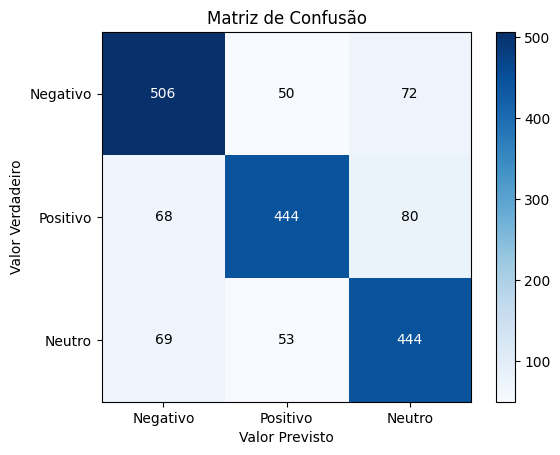

In [100]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

## 7.5 Salvando como pkl

In [102]:
# # Salvando o modelo em um arquivo PKL
# with open('/content/drive/MyDrive/Módulo 6/projeto/modelo_rf_novo.pkl', 'wb') as arquivo:
#     pickle.dump(model_rf, arquivo)
# with open('/content/drive/MyDrive/Módulo 6/projeto/modelo_rf_novo.pkl_', 'rb') as arquivo:
#     modelo_rf = pickle.load(arquivo)

# 8. 💣 Aplicação do modelo

In [109]:
# Lista de frases positivas
frases = [
    "Essa comida está horrível, não consigo comer.",
    "Eu amo essa música!",
    "Que dia maravilhoso!",
    "O jantar estava delicioso!",
    "Que filme terrível, não recomendo.",
    "Não suporto esse tipo de comportamento.",
    "Estou muito feliz com o resultado. 😁",
    "Adorei o novo filme do meu ator favorito.",
    "Eu gosto do banco BTG! 😍 #btgpactual",
    "Estou decepcionado com o serviço prestado. 😢",
]

# Criando o DataFrame
dataset = pd.DataFrame({'texto': frases})
dataset

,texto
0,"Essa comida está horrível, não consigo comer."
1,Eu amo essa música!
2,Que dia maravilhoso!
3,O jantar estava delicioso!
4,"Que filme terrível, não recomendo."
5,Não suporto esse tipo de comportamento.
6,Estou muito feliz com o resultado. 😁
7,Adorei o novo filme do meu ator favorito.
8,Eu gosto do banco BTG! 😍 #btgpactual
9,Estou decepcionado com o serviço prestado. 😢


In [164]:
from sklearn.preprocessing import MultiLabelBinarizer

# Criar uma instância do MultiLabelBinarizer
mlb = MultiLabelBinarizer()

dataset['pipeline'] = pipeline(dataset['texto'])

df_vectorized = create_word2vec_dataframe(dataset, 'pipeline', model)

# Transformar as listas de palavras em representações binárias
pipeline_encoded = mlb.fit_transform(df_vectorized['pipeline'])

# Criar um DataFrame com as representações binárias
df_pipeline_encoded = pd.DataFrame(pipeline_encoded, columns=mlb.classes_)

# Concatenar o DataFrame codificado com o DataFrame original
df_vectorized_encoded = pd.concat([df_vectorized, df_pipeline_encoded], axis=1)

# Adiciona uma coluna para cada emoji no DataFrame
for emoji, descricao in emoji_dict.items():
    df_vectorized_encoded[descricao] = df_vectorized_encoded['texto'].apply(lambda x: verifica_emoji(x, emoji))

df_vectorized_encoded

<ipython-input-164-936a625cbce5>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_vectorized_encoded[descricao] = df_vectorized_encoded['texto'].apply(lambda x: verifica_emoji(x, emoji))
<ipython-input-164-936a625cbce5>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_vectorized_encoded[descricao] = df_vectorized_encoded['texto'].apply(lambda x: verifica_emoji(x, emoji))
<ipython-input-164-936a625cbce5>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

,texto,pipeline,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,...,flor,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,doente
0,"Essa comida está horrível, não consigo comer.","[comida, horrível, não, consigir, comer]",-0.328411,0.422733,0.169041,0.221654,0.020666,-0.383773,0.301449,0.669123,...,0,0,0,0,0,0,0,0,0,0
1,Eu amo essa música!,"[amo, músico]",-0.037812,0.113966,0.031411,0.028688,0.002634,-0.179918,0.088549,0.257293,...,0,0,0,0,0,0,0,0,0,0
2,Que dia maravilhoso!,"[dia, maravilhoso]",-0.134866,0.629244,-0.086391,-0.152970,0.015084,-1.068315,0.595436,1.504190,...,0,0,0,0,0,0,0,0,0,0
3,O jantar estava delicioso!,"[jantar, delicioso]",-0.056563,0.152932,0.058884,0.023123,-0.012941,-0.207793,0.099546,0.300520,...,0,0,0,0,0,0,0,0,0,0
4,"Que filme terrível, não recomendo.","[filme, terrível, não, recomer]",-0.344018,0.425598,0.188099,0.245232,0.025784,-0.392168,0.317479,0.700714,...,0,0,0,0,0,0,0,0,0,0
5,Não suporto esse tipo de comportamento.,"[não, suporto, tipo, comportamento]",-0.473010,0.620966,0.214592,0.290096,0.026825,-0.590571,0.432071,0.975410,...,0,0,0,0,0,0,0,0,0,0
6,Estou muito feliz com o resultado. 😁,"[feliz, resultar]",-0.109274,0.361571,0.044611,0.020546,0.006228,-0.704480,0.341564,0.961167,...,0,0,0,0,0,0,0,0,0,0
7,Adorei o novo filme do meu ator favorito.,"[adorar, novo, filme, ator, favorito]",-0.126798,0.340535,0.024589,-0.013205,-0.009583,-0.480615,0.241888,0.651711,...,0,0,0,0,0,0,0,0,0,0
8,Eu gosto do banco BTG! 😍 #btgpactual,"[gostar, banco]",-1.015073,1.019318,-0.005170,-0.024038,0.024907,-1.240886,0.554309,2.078315,...,0,0,0,0,0,0,0,0,0,0
9,Estou decepcionado com o serviço prestado. 😢,"[decepcionar, serviço, prestar]",-0.308636,0.478588,0.069065,0.105228,0.003941,-0.599090,0.338872,0.834573,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# Realizar a predição usando os dados codificados
df_vectorized_encoded['classificacao'] = model_rf.predict(df_vectorized_encoded.iloc[:, 2:-1].values)

# Exibir o DataFrame resultante
df_vectorized_encoded

ValueError: ignored